In [71]:
import numpy as np
import pandas as pd

In [72]:
# get data from csv file
thread_df = pd.read_csv('data/uk_subreddit_threads.csv', encoding='latin-1')
comment_df = pd.read_csv('data/uk_subreddit_comments.csv')

# drop location column
comment_df = comment_df.drop(columns=['location'])
# rename submission_id column to thread_id
comment_df = comment_df.rename(columns={'submission_id': 'thread_id'})
comment_df.shape
# convert comment_df created column to datetime where format is %Y-%m-%d %H:%M:%S
comment_df['created'] = pd.to_datetime(comment_df['created'], format='%Y-%m-%d %H:%M:%S')
# extract year from comment_df created column
comment_df['year'] = comment_df['created'].dt.year
# extract quarter from comment_df created column
comment_df['quarter'] = comment_df['created'].dt.quarter
# drop missing values
comment_df = comment_df.dropna()

In [73]:
thread_df

,title,Motivation,score,id,url,comms_num,created,body
0,"In the middle of a desert, almost 100 miles fr...",Range Anxiety,793,150lepk,https://www.reddit.com/r/electricvehicles/comm...,310,1689451107,So I was driving across the desert of souther...
1,Charging networks make a huge difference.,Range Anxiety,470,13pe4fv,https://www.reddit.com/r/electricvehicles/comm...,284,1684816753,Recently added a Tesla Model Y to our househol...
2,"EV owners, have you ever been down a big enoug...",Performance,185,zeyq9s,https://www.reddit.com/r/electricvehicles/comm...,255,1670412119,I've never seen this happen but have never bee...
3,"The British have a gas shortage, so theyâre ...",Fuel Prices,572,pxucfc,https://electrek.co/2021/09/28/the-british-hav...,252,1632918554,NaN
4,EVs start with a bigger carbon footprint but t...,Environment,497,ybiuei,https://www.reddit.com/r/electricvehicles/comm...,241,1666534604,From today's [NY Times](https://www.nytimes.co...
...,...,...,...,...,...,...,...,...
392,First GWR electric-only train runs to and from...,NaN,11,ozwtl7,https://www.railtechnologymagazine.com/article...,0,1628355063,NaN
393,Electric Vehicle Road Tax in New South Wales t...,NaN,5,hkb55m,https://www.reddit.com/r/electricvehicles/comm...,0,1593744126,Australian state New South Wales to introduce ...
394,"Greatest Drive â Sydney Motorsport Park, New...",NaN,6,83atso,https://www.youtube.com/watch?v=aks8yJZkcOc,0,1520635119,NaN
395,"Sorry Norfolk, Lincolnshire, Derbyshire and Wa...",NaN,3,6dnyjh,http://www.stateofcharge.org.uk/editorial-sorr...,0,1495895247,NaN


In [74]:
# replace \n with space in comment_df body column
comment_df['body'] = comment_df['body'].str.replace('\n', ' ')
# replace all non-alphanumeric characters with space in comment_df body column
comment_df['body'] = comment_df['body'].str.replace('[^a-zA-Z0-9]', ' ')
# remove all rows where body column has a single word
comment_df = comment_df[comment_df['body'].str.split().str.len() > 1]
comment_df

/var/folders/j9/0qd6cw014pgb7rk0v_28prrh0000gn/T/ipykernel_5983/3352691034.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  comment_df['body'] = comment_df['body'].str.replace('[^a-zA-Z0-9]', ' ')


,body,score,created,id,thread_id,year,quarter
0,Checked supercharge info United Kingdom 118 s...,703,2023-07-15 21:19:43,js3upk8,150lepk,2023,3
1,I m in England I have an EV Today and tomo...,112,2023-07-15 22:03:13,js40lpa,150lepk,2023,3
2,Lol There s definitely a lot of people over ...,106,2023-07-15 21:13:16,js3ttv8,150lepk,2023,3
3,must have been a Brexiteer How s that going,166,2023-07-15 21:14:11,js3tyf4,150lepk,2023,3
4,A guy stopped me outside the store in Connecti...,25,2023-07-15 23:06:22,js48xjo,150lepk,2023,3
...,...,...,...,...,...,...,...
21163,Airbus is planning to launch their full hydrog...,3,2021-07-14 14:41:34,h55iuh5,ok1ej7,2021,3
21164,Might be banning domestic flights like France ...,1,2021-07-16 18:06:14,h5f1rhk,ok1ej7,2021,3
21165,Even worse is that they are building a new non...,1,2021-07-16 18:08:21,h5f222f,ok1ej7,2021,3
21167,Agreed Full hydrogen is today and especiall...,5,2021-07-14 15:00:45,h55l5dn,ok1ej7,2021,3


In [75]:


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

def text_process(text):
    #tokenise the text
    tokens = word_tokenize(text)
    #convert to lower case
    tokens = [w.lower() for w in tokens]
    #remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # remove numbers
    tokens = [w for w in tokens if not w.isdigit()]
    # remove words with length less than 3
    tokens = [w for w in tokens if len(w) > 2]
    return tokens


# apply the above function to the body column
comment_df['body'] = comment_df['body'].apply(text_process)



In [76]:
comment_df

,body,score,created,id,thread_id,year,quarter
0,"[checked, supercharge, info, united, kingdom, ...",703,2023-07-15 21:19:43,js3upk8,150lepk,2023,3
1,"[england, today, tomorrow, much, excess, wind,...",112,2023-07-15 22:03:13,js40lpa,150lepk,2023,3
2,"[lol, definitely, lot, people, like, change, h...",106,2023-07-15 21:13:16,js3ttv8,150lepk,2023,3
3,"[must, brexiteer, going]",166,2023-07-15 21:14:11,js3tyf4,150lepk,2023,3
4,"[guy, stopped, outside, store, connecticut, as...",25,2023-07-15 23:06:22,js48xjo,150lepk,2023,3
...,...,...,...,...,...,...,...
21163,"[airbus, planning, launch, full, hydrogen, lin...",3,2021-07-14 14:41:34,h55iuh5,ok1ej7,2021,3
21164,"[might, banning, domestic, flights, like, fran...",1,2021-07-16 18:06:14,h5f1rhk,ok1ej7,2021,3
21165,"[even, worse, building, new, non, electrified,...",1,2021-07-16 18:08:21,h5f222f,ok1ej7,2021,3
21167,"[agreed, full, hydrogen, today, especially, wi...",5,2021-07-14 15:00:45,h55l5dn,ok1ej7,2021,3


In [77]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment_scores(tokens):
    sentiment_scores = sid.polarity_scores(' '.join(tokens))
    return sentiment_scores

# Apply the function to the 'body' column and create new columns for sentiment scores
comment_df['sentiment_scores'] = comment_df['body'].apply(get_sentiment_scores)

# Extract individual sentiment scores and create new columns for them
comment_df['compound'] = comment_df['sentiment_scores'].apply(lambda x: x['compound'])
comment_df['pos'] = comment_df['sentiment_scores'].apply(lambda x: x['pos'])
comment_df['neg'] = comment_df['sentiment_scores'].apply(lambda x: x['neg'])
comment_df['neu'] = comment_df['sentiment_scores'].apply(lambda x: x['neu'])


In [78]:
comment_df

,body,score,created,id,thread_id,year,quarter,sentiment_scores,compound,pos,neg,neu
0,"[checked, supercharge, info, united, kingdom, ...",703,2023-07-15 21:19:43,js3upk8,150lepk,2023,3,"{'neg': 0.235, 'neu': 0.667, 'pos': 0.098, 'co...",-0.4404,0.098,0.235,0.667
1,"[england, today, tomorrow, much, excess, wind,...",112,2023-07-15 22:03:13,js40lpa,150lepk,2023,3,"{'neg': 0.031, 'neu': 0.852, 'pos': 0.118, 'co...",0.6115,0.118,0.031,0.852
2,"[lol, definitely, lot, people, like, change, h...",106,2023-07-15 21:13:16,js3ttv8,150lepk,2023,3,"{'neg': 0.289, 'neu': 0.487, 'pos': 0.224, 'co...",-0.6249,0.224,0.289,0.487
3,"[must, brexiteer, going]",166,2023-07-15 21:14:11,js3tyf4,150lepk,2023,3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000
4,"[guy, stopped, outside, store, connecticut, as...",25,2023-07-15 23:06:22,js48xjo,150lepk,2023,3,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",-0.2263,0.000,0.095,0.905
...,...,...,...,...,...,...,...,...,...,...,...,...
21163,"[airbus, planning, launch, full, hydrogen, lin...",3,2021-07-14 14:41:34,h55iuh5,ok1ej7,2021,3,"{'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'comp...",0.2023,0.114,0.000,0.886
21164,"[might, banning, domestic, flights, like, fran...",1,2021-07-16 18:06:14,h5f1rhk,ok1ej7,2021,3,"{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'comp...",0.7717,0.391,0.000,0.609
21165,"[even, worse, building, new, non, electrified,...",1,2021-07-16 18:08:21,h5f222f,ok1ej7,2021,3,"{'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound...",-0.7184,0.000,0.500,0.500
21167,"[agreed, full, hydrogen, today, especially, wi...",5,2021-07-14 15:00:45,h55l5dn,ok1ej7,2021,3,"{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'comp...",0.8074,0.133,0.000,0.867


In [79]:
# drop columns negative, neutral, and positive
comment_df = comment_df.drop(columns=['neg', 'neu', 'pos'])
# rename compound column to sentiment
comment_df = comment_df.rename(columns={'compound': 'sentiment'})
comment_df

,body,score,created,id,thread_id,year,quarter,sentiment_scores,sentiment
0,"[checked, supercharge, info, united, kingdom, ...",703,2023-07-15 21:19:43,js3upk8,150lepk,2023,3,"{'neg': 0.235, 'neu': 0.667, 'pos': 0.098, 'co...",-0.4404
1,"[england, today, tomorrow, much, excess, wind,...",112,2023-07-15 22:03:13,js40lpa,150lepk,2023,3,"{'neg': 0.031, 'neu': 0.852, 'pos': 0.118, 'co...",0.6115
2,"[lol, definitely, lot, people, like, change, h...",106,2023-07-15 21:13:16,js3ttv8,150lepk,2023,3,"{'neg': 0.289, 'neu': 0.487, 'pos': 0.224, 'co...",-0.6249
3,"[must, brexiteer, going]",166,2023-07-15 21:14:11,js3tyf4,150lepk,2023,3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,"[guy, stopped, outside, store, connecticut, as...",25,2023-07-15 23:06:22,js48xjo,150lepk,2023,3,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",-0.2263
...,...,...,...,...,...,...,...,...,...
21163,"[airbus, planning, launch, full, hydrogen, lin...",3,2021-07-14 14:41:34,h55iuh5,ok1ej7,2021,3,"{'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'comp...",0.2023
21164,"[might, banning, domestic, flights, like, fran...",1,2021-07-16 18:06:14,h5f1rhk,ok1ej7,2021,3,"{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'comp...",0.7717
21165,"[even, worse, building, new, non, electrified,...",1,2021-07-16 18:08:21,h5f222f,ok1ej7,2021,3,"{'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound...",-0.7184
21167,"[agreed, full, hydrogen, today, especially, wi...",5,2021-07-14 15:00:45,h55l5dn,ok1ej7,2021,3,"{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'comp...",0.8074


In [80]:
sentiment_df = comment_df.groupby(['year', 'quarter'])['sentiment'].mean().reset_index()
# order by year and quarter
sentiment_df = sentiment_df.sort_values(by=['year', 'quarter'])
# convert year and quarter to datetime column
sentiment_df['Date'] = pd.to_datetime(sentiment_df['year'].astype(str) + 'Q' + sentiment_df['quarter'].astype(str))
# drop year and quarter columns
sentiment_df = sentiment_df.drop(columns=['year', 'quarter'])

sentiment_df
# save sentiment_df to csv
sentiment_df.to_csv('data/sentiment_df.csv', index=False)


In [81]:
# rename Date column to ds and sentiment column to yhat
sentiment_df = sentiment_df.rename(columns={'Date': 'ds', 'sentiment': 'yhat'})
sentiment_df

,yhat,ds
0,0.528067,2014-07-01
1,0.000000,2014-10-01
2,0.394433,2015-01-01
3,0.796120,2015-04-01
4,0.346976,2015-07-01
5,0.233333,2015-10-01
6,0.088100,2016-04-01
7,0.199350,2016-10-01
8,0.000000,2017-01-01
9,0.183275,2017-04-01


In [82]:
# used google colab to run prophet
# read the csv file with forecasted data
forecast_df = pd.read_csv('data/forecast.csv')
# convert ds column to datetime
forecast_df['ds'] = pd.to_datetime(forecast_df['ds'])
# keep only ds and yhat columns
forecast_df = forecast_df[['ds', 'yhat']]
forecast_df

,ds,yhat
0,2010-01-01,0.358790
1,2010-04-01,0.447422
2,2010-07-01,0.427943
3,2010-10-01,0.315121
4,2011-01-01,0.390800
5,2011-04-01,0.518713
6,2011-07-01,0.409017
7,2011-10-01,0.309298
8,2012-01-01,0.419156
9,2012-04-01,0.252177


In [83]:
# add rows from forecast_df to sentiment_df where ds does not exist in sentiment_df
sentiment_df = sentiment_df.append(forecast_df[~forecast_df['ds'].isin(sentiment_df['ds'])])
# sort sentiment_df by ds
sentiment_df = sentiment_df.sort_values(by=['ds'])
# replace value in row with ds "2014-10-01" to 0.255666
sentiment_df.loc[sentiment_df['ds'] == '2014-10-01', 'yhat'] = 0.255666
# replace value in row with ds "2017-01-01" to 0.204268
sentiment_df.loc[sentiment_df['ds'] == '2017-01-01', 'yhat'] = 0.204268
sentiment_df


/var/folders/j9/0qd6cw014pgb7rk0v_28prrh0000gn/T/ipykernel_5983/3692660275.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_df = sentiment_df.append(forecast_df[~forecast_df['ds'].isin(sentiment_df['ds'])])


,yhat,ds
0,0.358790,2010-01-01
1,0.447422,2010-04-01
2,0.427943,2010-07-01
3,0.315121,2010-10-01
4,0.390800,2011-01-01
5,0.518713,2011-04-01
6,0.409017,2011-07-01
7,0.309298,2011-10-01
8,0.419156,2012-01-01
9,0.252177,2012-04-01


In [84]:
# save sentiment_df to csv as ev_sentiment_df
sentiment_df.to_csv('data/ev_sentiment_df.csv', index=False)

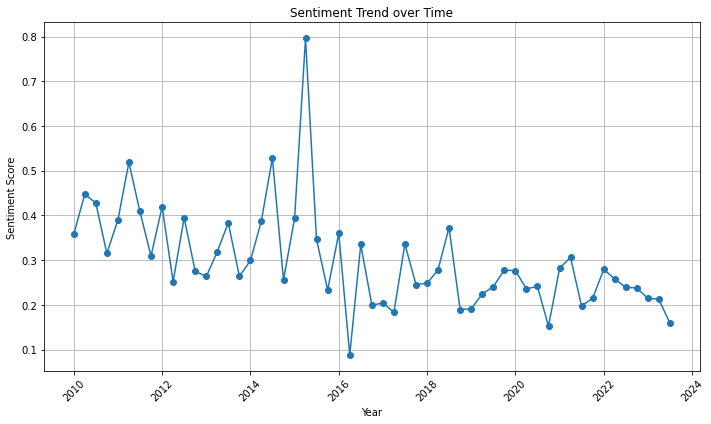

In [97]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(sentiment_df['ds'], sentiment_df['yhat'], marker='o')
plt.title('Sentiment Trend over Time')
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
